<a href="https://colab.research.google.com/github/junyang-chin/DSUB-5.0/blob/Day-9-REV-01/Day_9_Classification_Model_on_the_Framingham_Dataset_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Producing a Classification Model using the Framingham Dataset
This is a supervised learning using the Decision Treee method on the Framingham dataset


## Importing the dataset into dataframe

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/framingham.csv")

## Exploring the dataframe
Top 10 rows

In [3]:
df.head(10)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
df.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Plotting a Correlation Heatmap

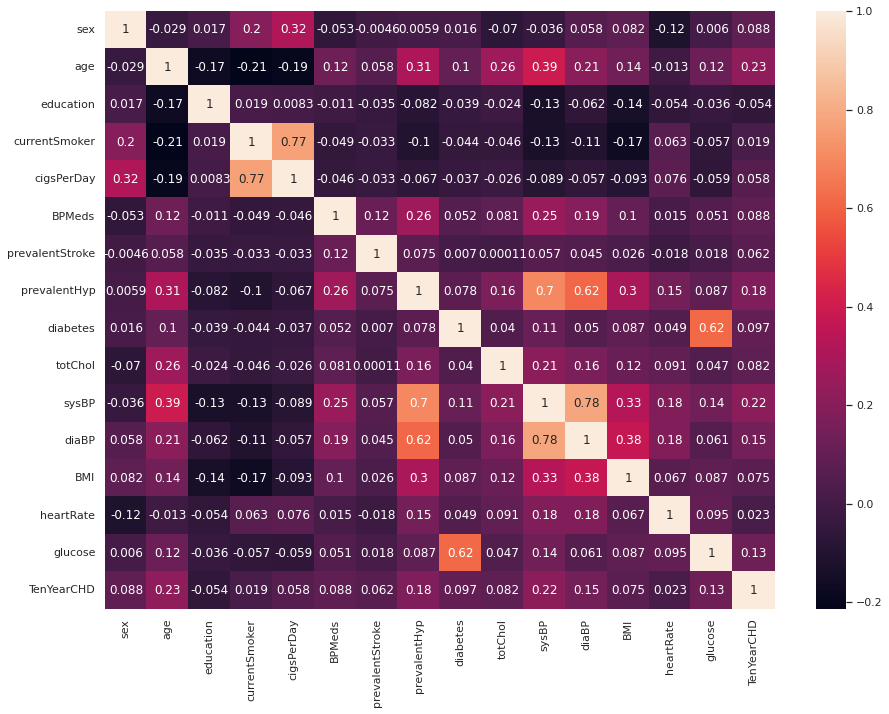

In [5]:
sns.set(rc = {"figure.figsize":(15,11)})

corr = df.corr()
sns.heatmap(corr, annot = True)

From the heatmap above, it is observed that:
1. The more the amount of cigarates smoked per day the more likely the person is a current smoker
2. High blood pressure relates to higher chance of Prevalent Hypertension
3. High glucose level relates to higher chance to be diabetic
4. The older the age the lesser chance it is the person is a current smoker
5. The lower BMI the higher chance it is the person is  a current smoker

## Plotting the correlations into graphs
### Age vs Systolic Blood Pressure

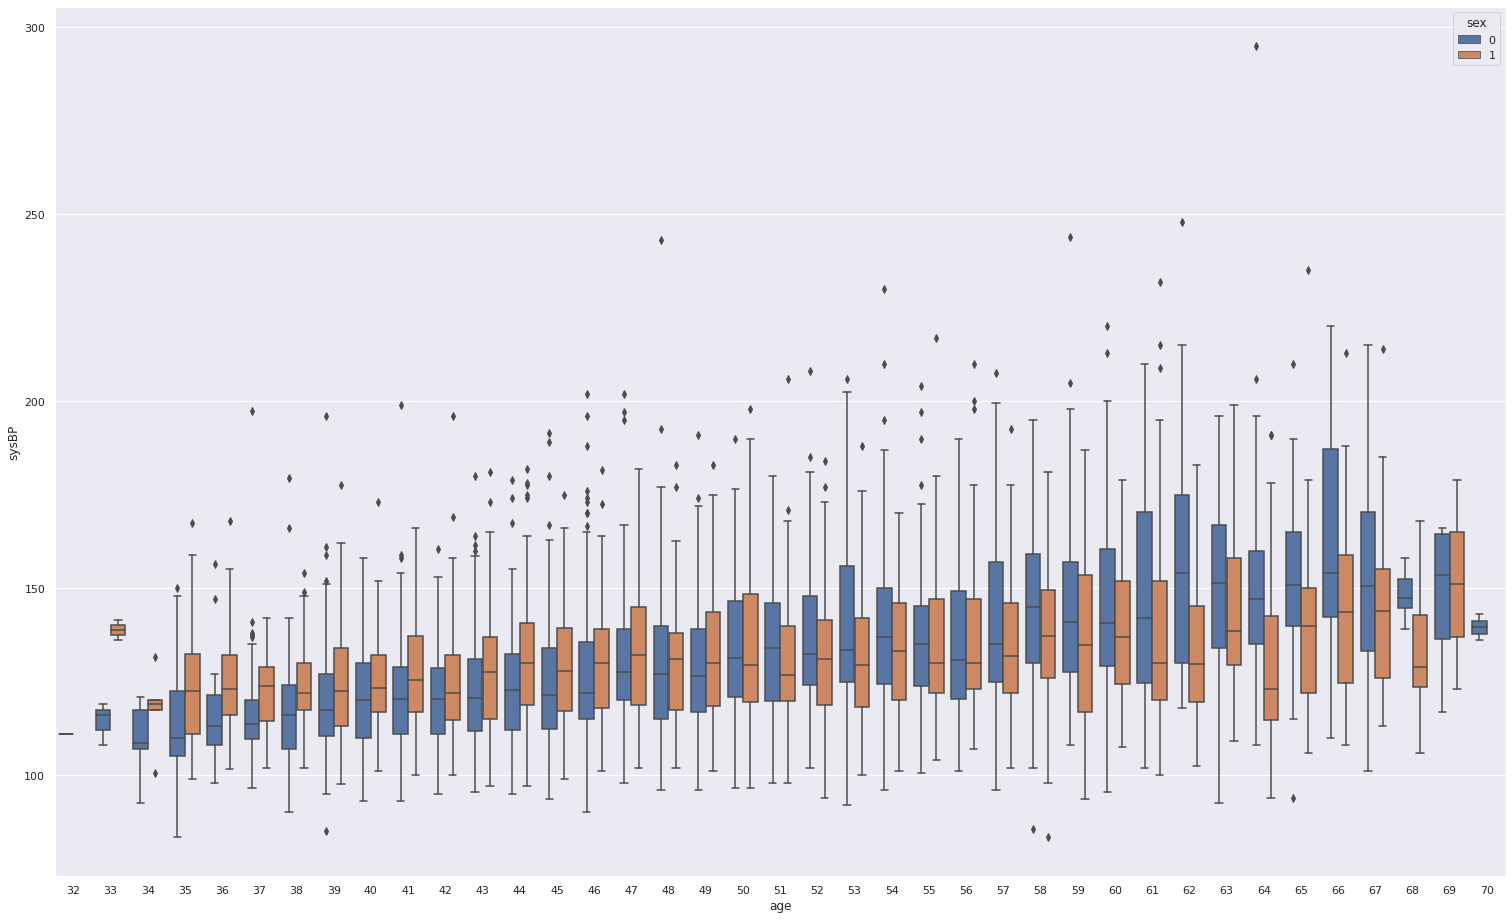

In [6]:
sns.set( rc = {'figure.figsize':(26,16)})
ax = sns.boxplot(data= df, x = 'age', y = 'sysBP', hue = "sex")

**1 means male 0 means female**<br>
From the plot above, it is observed that, as age reaches 50 the average person is more likely to develop high Systolic Blood Pressure. The likelyhood is even higher for female

### Age vs TenYearCHD


In [7]:
df2 = df[df["TenYearCHD"] == 1]
df2

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
15,0,38,2.0,1,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0,1
17,0,46,2.0,1,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0,1
25,1,47,4.0,1,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,1,50,1.0,0,0.0,0.0,0,0,0,260.0,119.0,74.0,21.85,80.0,72.0,1
4223,1,56,4.0,0,0.0,1.0,0,1,0,287.0,149.0,98.0,21.68,90.0,75.0,1
4226,1,58,1.0,0,0.0,0.0,0,0,0,233.0,125.5,84.0,26.05,67.0,76.0,1
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1


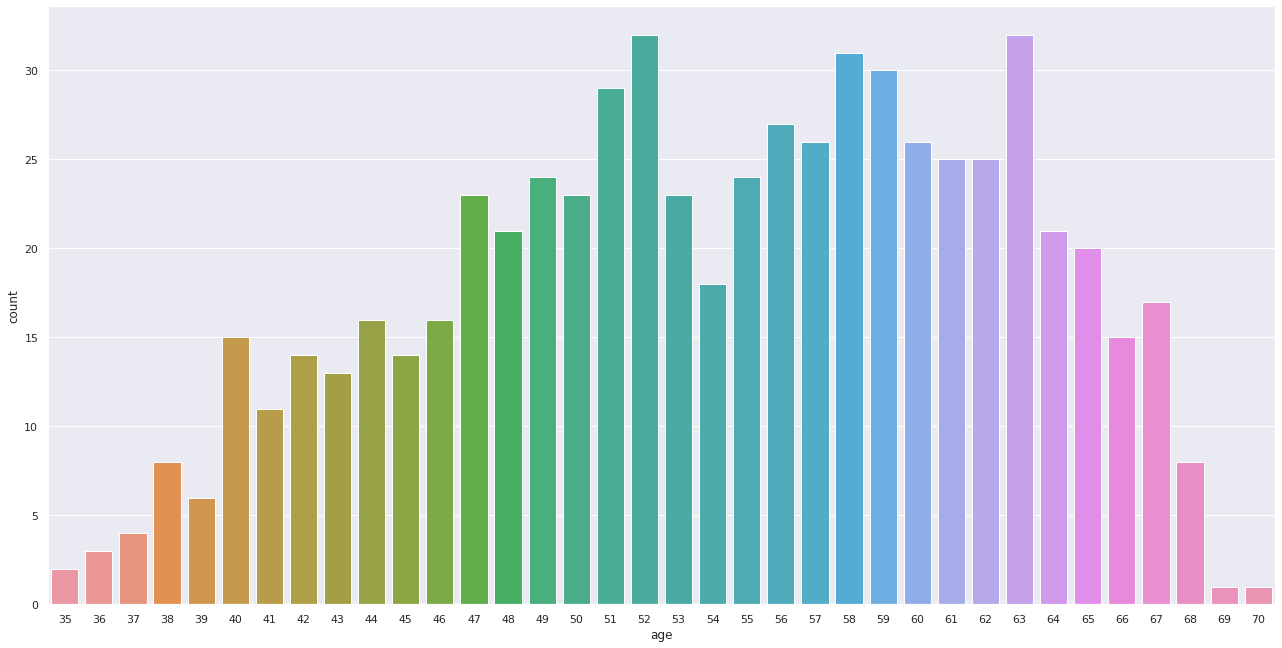

In [8]:
sns.set( rc = {'figure.figsize':(22,11)})
ax = sns.countplot(data= df2, x = 'age' )

It is oberserved that, that people in their 50s to 60s has the most chronic heart disease case among other age groups

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9d452da8c0> (for post_execute):


KeyboardInterrupt: ignored

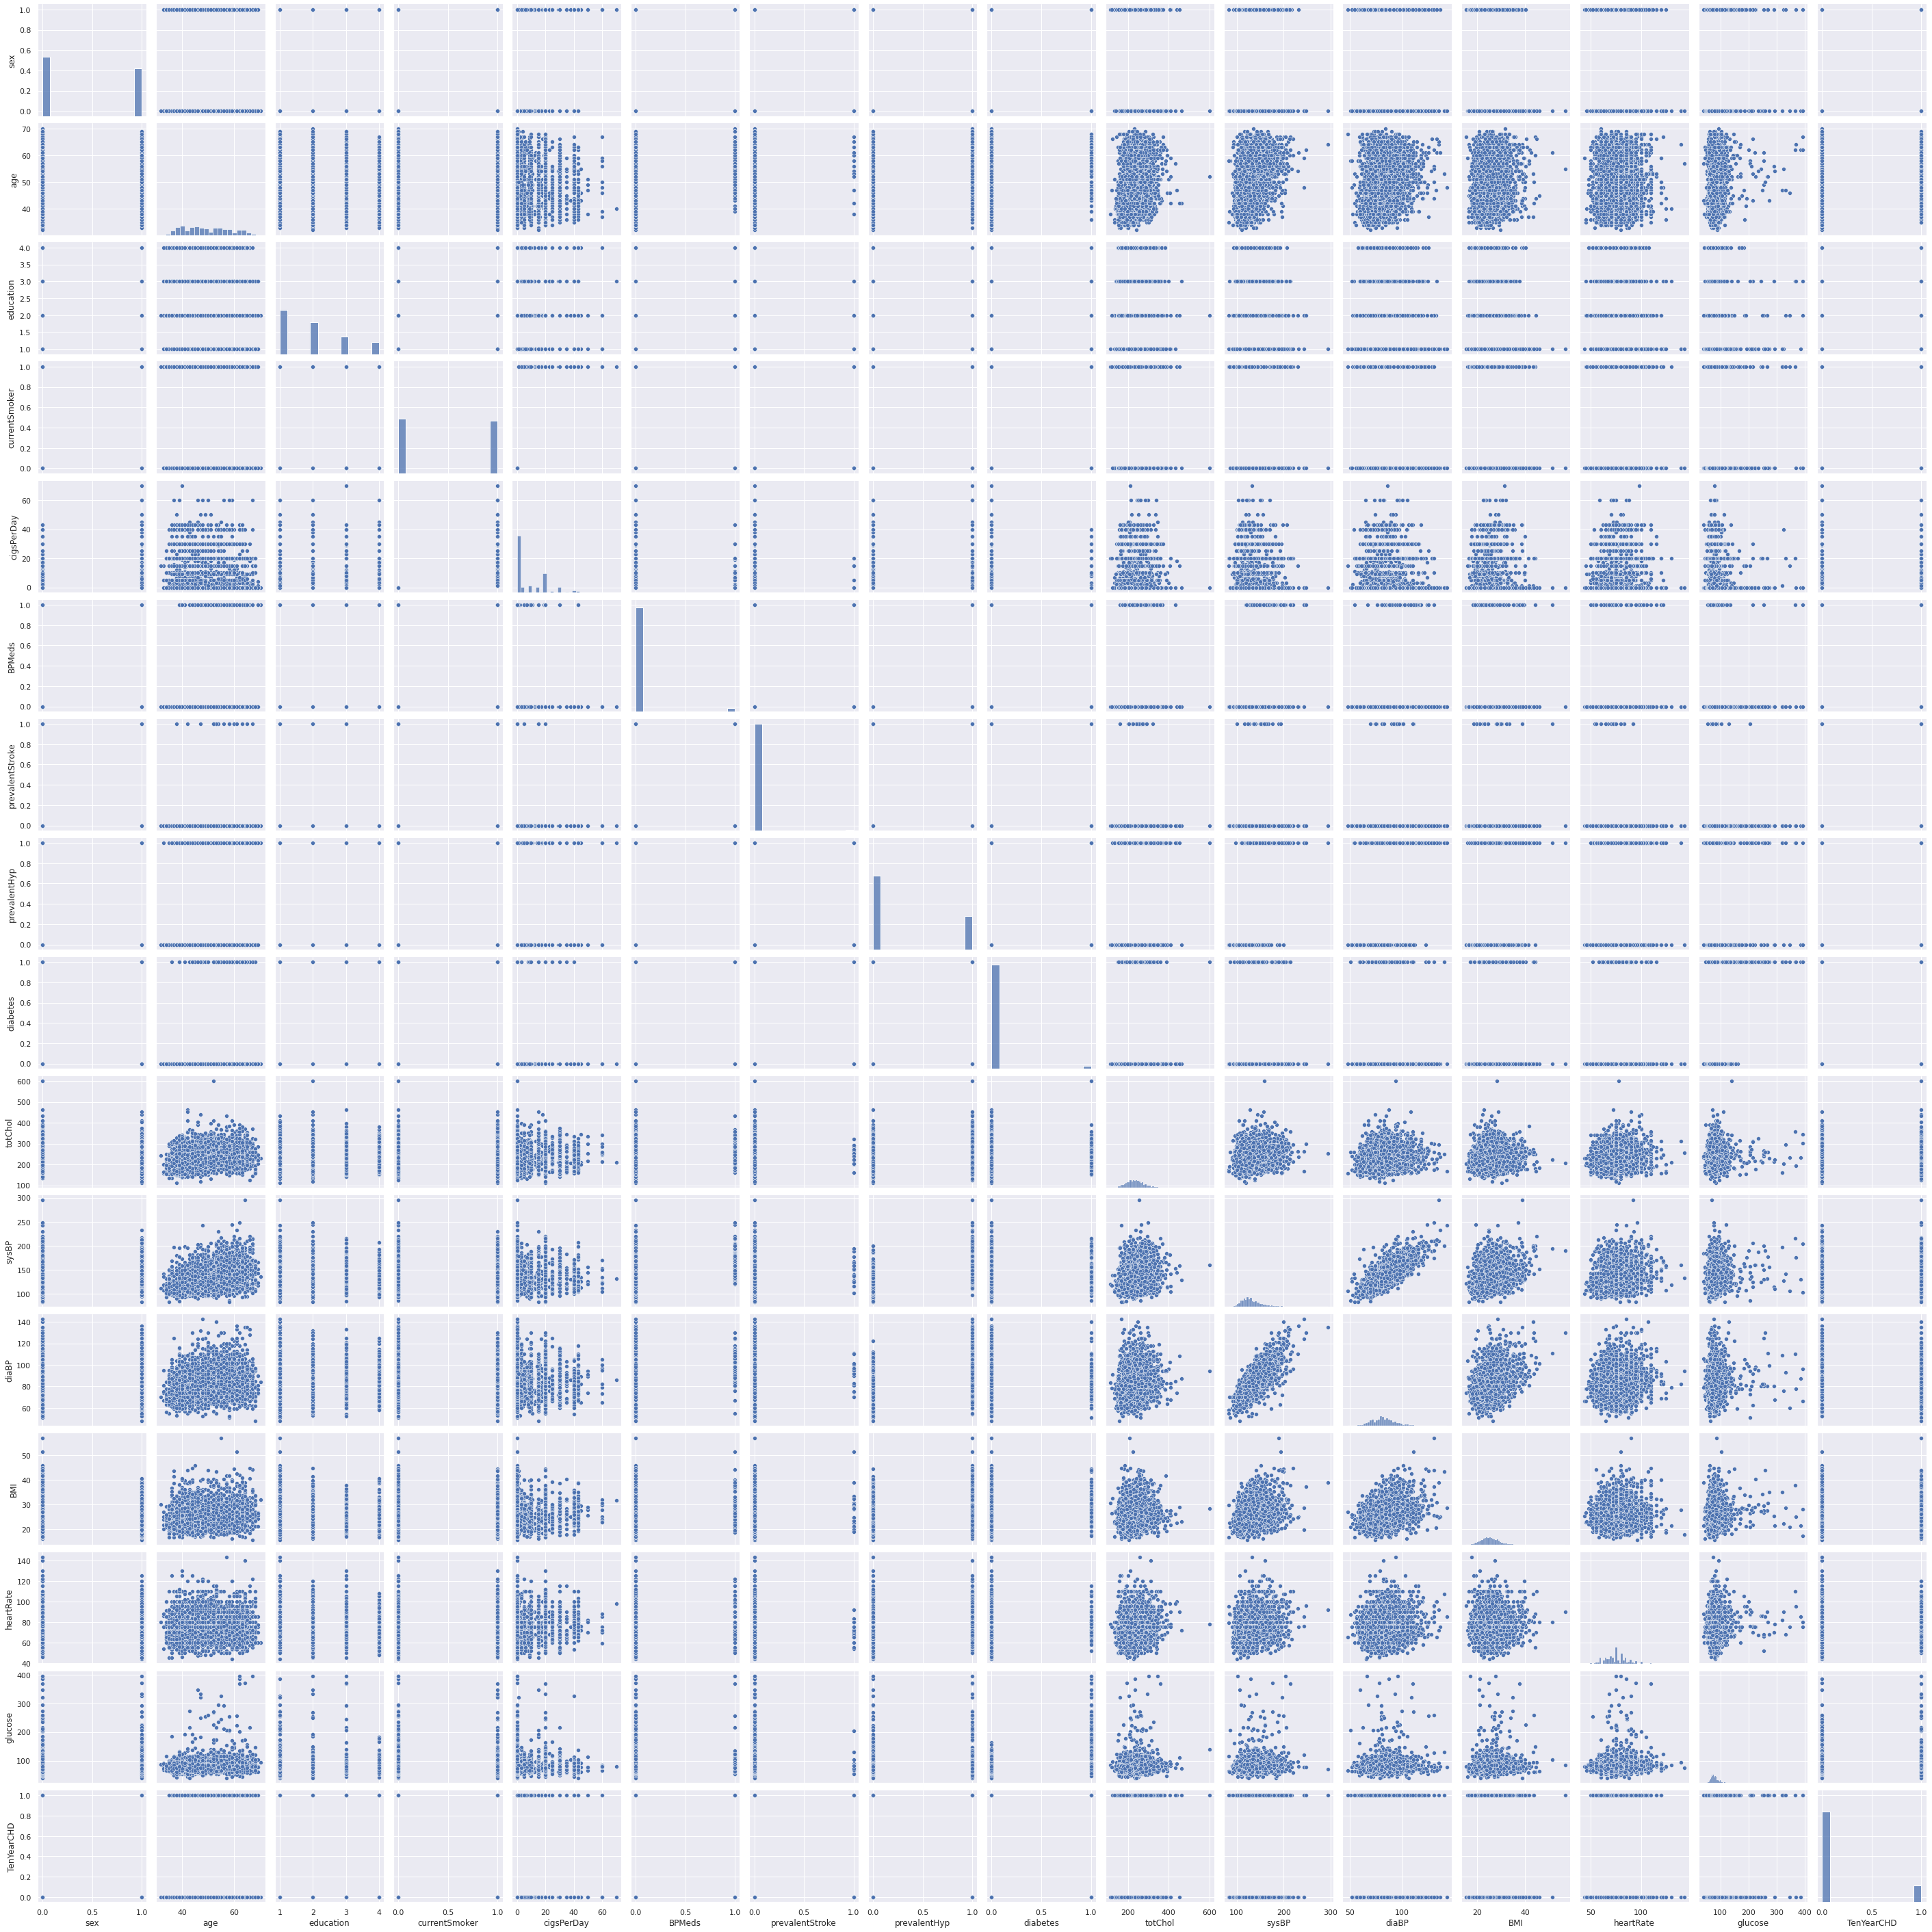

In [20]:
sns.pairplot(df)

Still not very sure on what I can do with the information in this pairplot

## Making a Decision Tree Classification Model with sklearn

In [10]:
df.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Dropping rows with missing values

In [11]:
df = df.dropna()

Preparing the data for modelling

In [12]:
train_data = df.drop('prevalentHyp', axis = 1)
train_labels = df['prevalentHyp']

### Fitting the Decision Tree Classifier Model with training data

In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=4)

### Visualising the decision tree

In [22]:
import graphviz
columns = list(train_data.columns)
dot_data = tree.export_graphviz(model, out_file = None, feature_names = columns, class_names = ["No", "Yes"], filled = True, rounded = True)

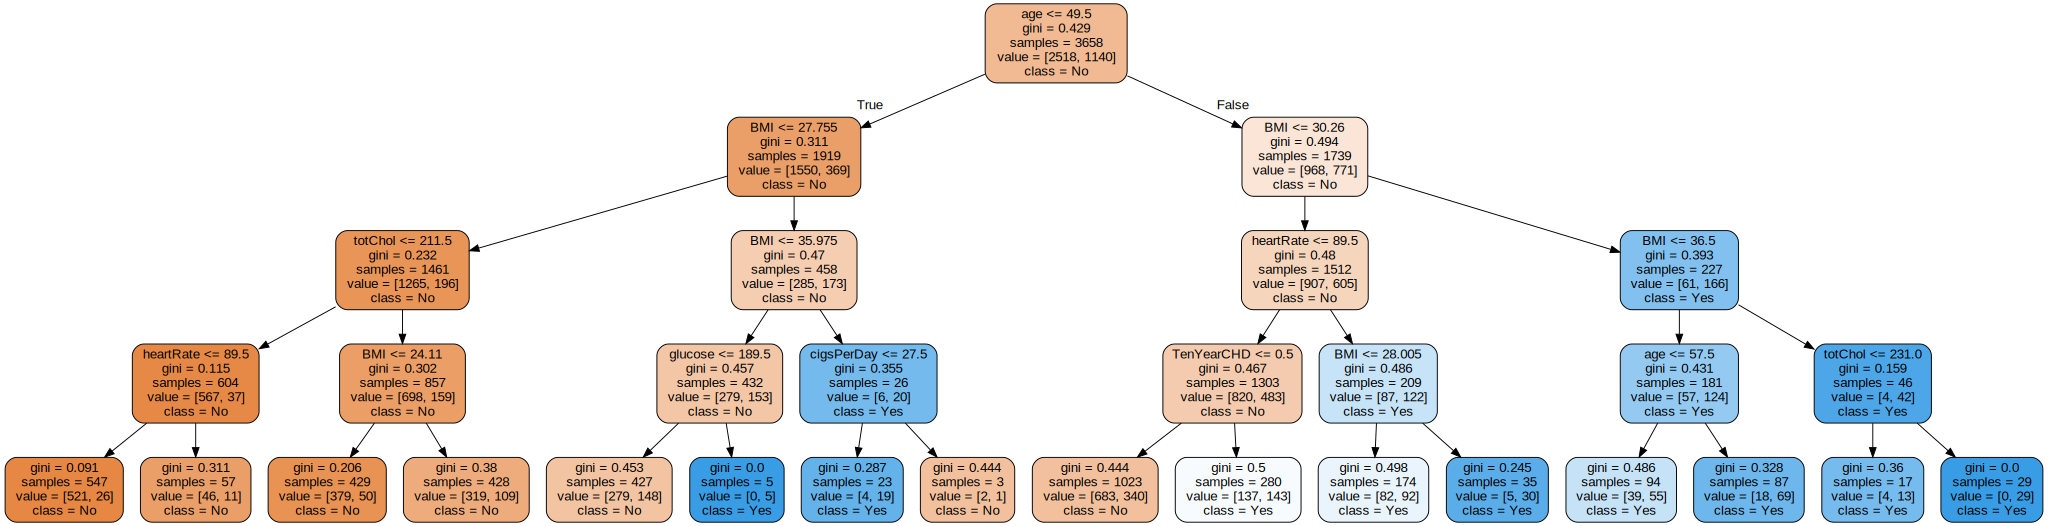

In [23]:
graph = graphviz.Source(dot_data)
graph

If a person have the following condition:
* Systolic Blood Pressure below 139.75 and
* systolic Blood Pressure below 89.75
* On blood pressure medications

The person will most likely have prevalent hypertension. Let's explore more on other factors

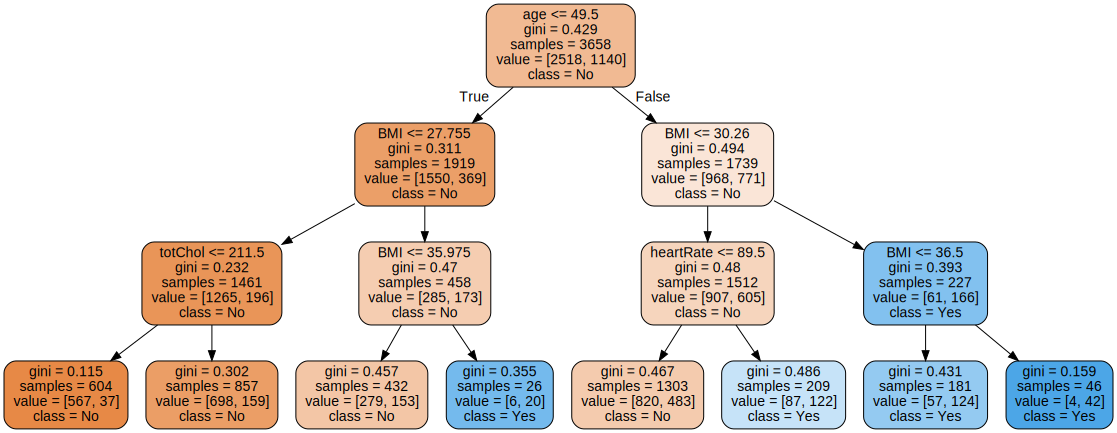

In [24]:
train_data = df.drop(["prevalentHyp","sysBP","diaBP","BPMeds"], axis = 1)
train_labels = df["prevalentHyp"]
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)
columns = list(train_data.columns)
dot_data = tree.export_graphviz(model, out_file = None, feature_names = columns, class_names = ["No", "Yes"], filled = True, rounded = True)
graph = graphviz.Source(dot_data)
graph

Here it is clear that if a person is:
* Over the age of 50
* Having BMI >36.5(Obese)

It is very likely the person have prevalent hypertension
